In [1]:
import pandas as pd 
import numpy as np
import random

# Simulate a league with perfect competion
Perfect competition assumes a 50% chance of any team winning a game and no draws


In [2]:
# Create a league of 20 teams to simulate: Prem, laLiga, SerieA and Ligue1
league20 = np.arange(1,21,1)

# Create a league of 18 teams to simulate: Boundesliga & Eredivisie
league18 = np.arange(1,19,1)

games20 = list(np.arange(1,39,1))
games18 = list(np.arange(1,37,1))

# Create an empty dictionary, each key is the team number
league_tally20 =  dict.fromkeys(league20, [])  # For leagues with 20 teams
league_tally18 =  dict.fromkeys(league18, [])  # For leagues with 18 teams

In [3]:
# Model results of 50/50 win only does one side (Home or Away)

def generate_results(league_tally, league, games):
    
    for key in league_tally:   # Cycle through each team in the league 
        points_tally = [] 
        for game in games:     # For each team cycle through all the games they play in a season
            rnd = random.uniform(0, 1)  # Teams have 50/50 chance of loss or win  
            
            if rnd < .5:
                points = 3     # Teams get 3 points for a win
            else:
                points = 0     # Teams get 0 points for a loss 
            
            points_tally.append(points)

        league_tally[key] = points_tally  # Add points to league tally
    return league_tally

 

In [4]:
# Simulate for league with 20 teams

def perfect_competition(league_tally, league, games):   
    # Loop over 11 seasons
    seasons = np.arange(1,11,1)
    # Set initial season for merge
    results = pd.DataFrame(generate_results(league_tally, league, games))
    season_x = pd.DataFrame(results.sum())
    season_x

    # Merge tables across all seasons
    for season in seasons:
        results = pd.DataFrame(generate_results(league_tally, league, games))
        season_y = pd.DataFrame(results.sum(), columns=[season])
        season_x = pd.concat([season_x, season_y], axis=1)
    return season_x

# Simulate for leagues with 20 teams 
Perfect_Competition20 = perfect_competition(league_tally20, league20, games20) 

#Simulate for leagues with 18 teams
Perfect_Competition18 = perfect_competition(league_tally18, league18, games18)

In [5]:
perfect_league20 = Perfect_Competition20.T
perfect_league18 = Perfect_Competition18.T

# Analyse actual European league results 

In [6]:
# DEFINE FUNCTION TO READ FILES FROM GITHUB REPOS
def read_file(url):

    """
    Takes GitHub url as an argument,
    pulls CSV file located @ github URL.

    """

    url = url + "?raw=true"
    df = pd.read_csv(url)
    return df

# Read in data for leagues
premier_league = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Premier_League.csv")
la_liga = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/LA_Liga.csv")
Bundesliga = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Bundesliga.csv")
SerieA = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/SerieA.csv")
Ligue1 = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Ligue1.csv")
Eredivisie = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Eredivisie.csv")


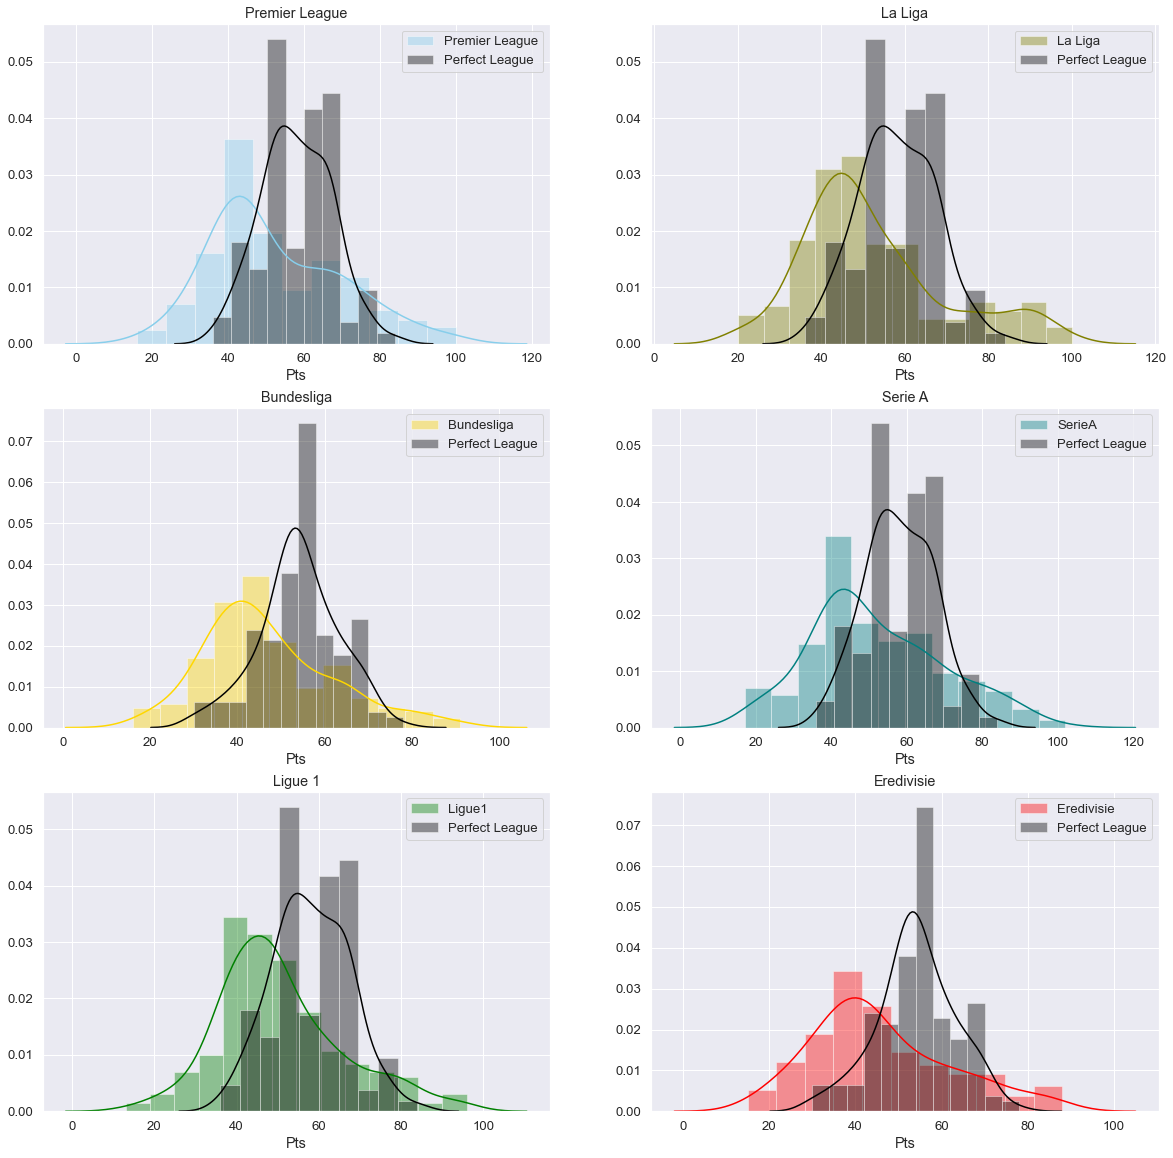

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(font_scale=1.2) 
df = sns.load_dataset("iris")

fig, axs = plt.subplots(3, 2, figsize=(20, 20))

ax = sns.distplot(premier_league.Pts, kde=True, color="skyblue", ax=axs[0, 0], label="Premier League")
ax.set_title('Premier League')
ax = sns.distplot(la_liga.Pts, kde=True, color="olive", ax=axs[0, 1], label="La Liga")
ax.set_title('La Liga')
ax = sns.distplot(Bundesliga.Pts, kde=True, color="gold", ax=axs[1, 0], label="Bundesliga")
ax.set_title('Bundesliga')
ax = sns.distplot(SerieA.Pts, kde=True, color="teal", ax=axs[1, 1], label="SerieA")
ax.set_title('Serie A')
ax = sns.distplot(Ligue1.Pts, kde=True, color="green", ax=axs[-1, 0], label="Ligue1")
ax.set_title('Ligue 1')
ax = sns.distplot(Eredivisie.Pts, kde=True, color="red", ax=axs[-1, 1], label="Eredivisie")
ax.set_title('Eredivisie')
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[0, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[0, 1], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league18, kde=True, color="black", ax=axs[1, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[1, 1], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[-1, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league18, kde=True, color="black", ax=axs[-1, 1], label="Perfect League")
ax.legend()
plt.savefig('football_league.png', dpi=200)
plt.show()

# Statistical Analysis 

## Perform a Kolmogorov-Smirnov test 
We will set up a hypothesis test 
h0 There is no difference between the perfect league and league x
h1 There is a difference between the perfect league and 

In [8]:
from scipy.stats import ks_2samp

# Flatten our perfect league 
flat20 = perfect_league20.to_numpy().flatten()
flat18 = perfect_league18.to_numpy().flatten()

print("Premier League", ks_2samp(premier_league.Pts, flat20))
print("la liga", ks_2samp(la_liga.Pts, flat20))
print("Bundesliga", ks_2samp(Bundesliga.Pts, flat18))
print("Serie A", ks_2samp(SerieA.Pts, flat20))
print("Ligue 1", ks_2samp(Ligue1.Pts, flat20))
print("Eredivisie", ks_2samp(Eredivisie.Pts, flat18))

Premier League KstestResult(statistic=0.4090909090909091, pvalue=7.446508649203023e-17)
la liga KstestResult(statistic=0.4090909090909091, pvalue=7.446508649203023e-17)
Bundesliga KstestResult(statistic=0.42424242424242425, pvalue=2.323013401236552e-16)
Serie A KstestResult(statistic=0.38181818181818183, pvalue=1.1125227132299648e-14)
Ligue 1 KstestResult(statistic=0.43636363636363634, pvalue=3.368165356231983e-19)
Eredivisie KstestResult(statistic=0.4595959595959596, pvalue=3.078442556584765e-19)


In [19]:
# Run a montecarlo simulation over 1,000 turns to get distribution of KS scores for each
def KS_MonteCarlo(euro_league, league_tally, league, games):
    simulation = np.arange(1,1001,1)
    ks_run =[]
    for run in simulation:
        flat20 = perfect_competition(league_tally, league, games).T.to_numpy().flatten()
        ks_run.append(ks_2samp(euro_league.Pts, flat20).statistic)
    
    return pd.DataFrame(ks_run)


In [20]:
# Simulate for each league
Prem_KS = KS_MonteCarlo(premier_league, league_tally20, league20, games20)
LALiga_KS = KS_MonteCarlo(la_liga, league_tally20, league20, games20)
Bundes_KS = KS_MonteCarlo(Bundesliga, league_tally18, league18, games18)
SerieA_KS = KS_MonteCarlo(SerieA, league_tally20, league20, games20)
Ligue1_KS = KS_MonteCarlo(Ligue1, league_tally20, league20, games20)
Eredivisie_KS = KS_MonteCarlo(Eredivisie, league_tally18, league18, games18)

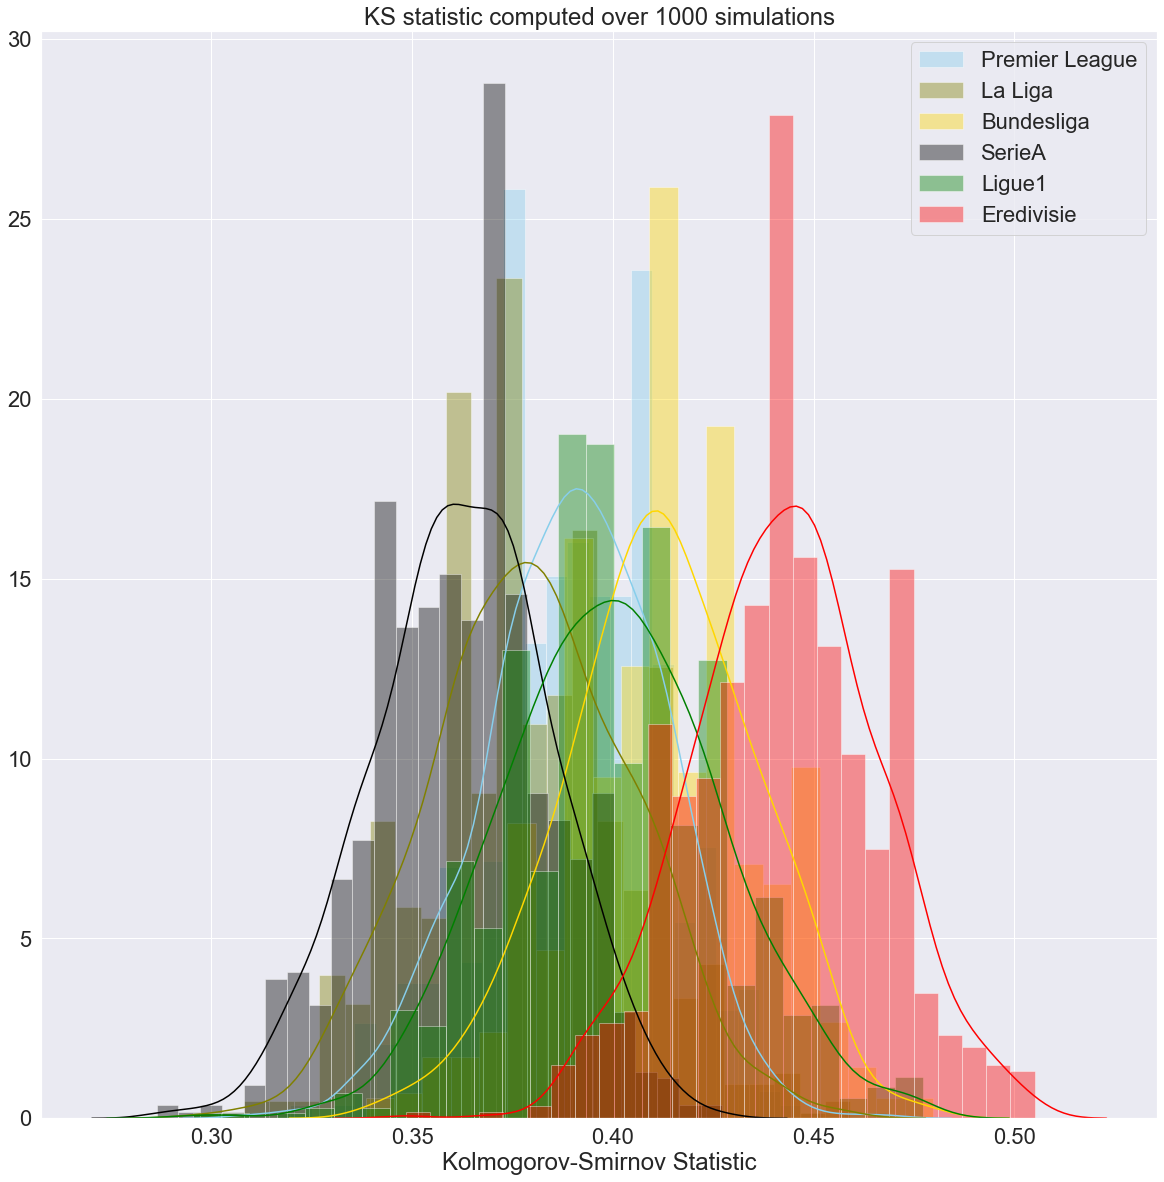

In [30]:
# Plot KS Scores
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(font_scale=2) 
df = sns.load_dataset("iris")

fig, axs = plt.subplots(figsize=(20, 20))

ax = sns.distplot(Prem_KS, kde=True, color="skyblue", label="Premier League")
ax = sns.distplot(LALiga_KS, kde=True, color="olive", label="La Liga")
ax = sns.distplot(Bundes_KS, kde=True, color="gold", label="Bundesliga")
ax = sns.distplot(SerieA_KS, kde=True, color="black", label="SerieA")
ax = sns.distplot(Ligue1_KS, kde=True, color="green", label="Ligue1")
ax = sns.distplot(Eredivisie_KS, kde=True, color="red", label="Eredivisie")
ax.set_title('KS statistic computed over 1000 simulations')
ax.legend()
ax.set_xlabel("Kolmogorov-Smirnov Statistic")
plt.savefig('football_league_KS_Plot.png', dpi=200)
plt.show()